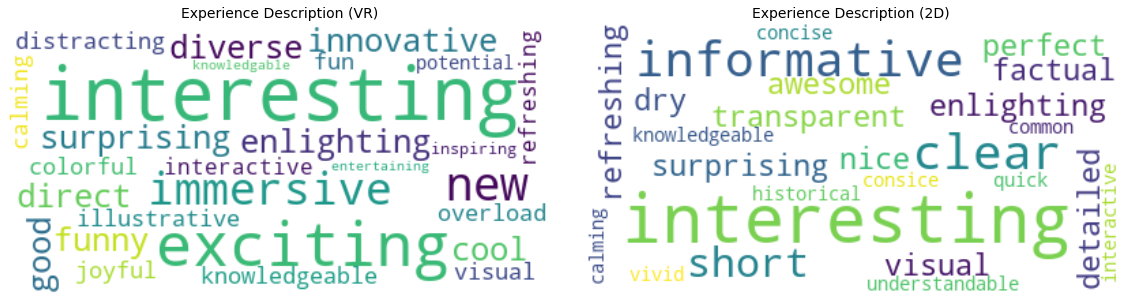

<Figure size 432x288 with 0 Axes>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the data from CSV file
data_per_participants = pd.read_csv("./data/questionaire_results_per_participant.csv", sep=";")

# Convert text to lowercase
data_per_participants['experience_description_VR'] = data_per_participants['experience_description_VR'].str.lower()
data_per_participants['experience_description_2D'] = data_per_participants['experience_description_2D'].str.lower()


# Create a WordCloud object with rectangular shape
wc_vr = WordCloud(
    background_color='white',
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
)

wc_2d = WordCloud(
    background_color='white',
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
)

# Generate word cloud for experience_description_VR
vr_text = ' '.join(text for text in data_per_participants['experience_description_VR'])
wc_vr.generate(vr_text)

# Generate word cloud for experience_description_2D
twod_text = ' '.join(text  for text in data_per_participants['experience_description_2D'])
wc_2d.generate(twod_text)

# Create subplots and adjust figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# Display word cloud for experience_description_VR on the left
axes[0].imshow(wc_vr, interpolation='bilinear')
axes[0].set_title('Experience Description (VR)', fontsize=14)
axes[0].axis('off')

# Display word cloud for experience_description_2D on the right
axes[1].imshow(wc_2d, interpolation='bilinear')
axes[1].set_title('Experience Description (2D)', fontsize=14)
axes[1].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.05)
plt.show()

plt.savefig('./plots/user_experience_wordcloud.pdf')


In [5]:

# Define word groups and their respective words
word_groups = {
    'Positive Experience': ['interesting', 'good', 'cool', 'fun', 'joyful', 'perfect', 'calming'],
    'Clarity of Visualization': ['direct', 'clear', 'transparent', 'understandable', 'concise'],
    'Novelty and Innovation Level': ['new', 'surprising', 'refreshing', 'potential', 'exciting', 'innovative', 'enlighting', 'inspiring'],
    'Knowledge Factor': ['knowledgeable', 'historical', 'informative', 'dry', 'factual', 'illustrative'],
    'Entertainment Factor': ['funny', 'entertaining', 'vivid'],
    'Immersion Level': ['immersive'],
    'Distraction Factor': ['distracting', 'visual-overload']
}

# Count the frequency of words in each group for VR experience
vr_word_counts = {}
for group, words in word_groups.items():
    vr_word_counts[group] = data_per_participants['experience_description_VR'].str.count('|'.join(words)).sum()

# Count the frequency of words in each group for 2D experience
twod_word_counts = {}
for group, words in word_groups.items():
    twod_word_counts[group] = data_per_participants['experience_description_2D'].str.count('|'.join(words)).sum()

# Combine word counts from both experiences
combined_word_counts = {k: (twod_word_counts.get(k, 0), vr_word_counts.get(k, 0)) for k in set(twod_word_counts) | set(vr_word_counts)}

# Sort the combined word counts in descending order
sorted_word_counts = dict(sorted(combined_word_counts.items(), key=lambda x: sum(x[1]), reverse=True))

# Extract word groups and word lists
groups = list(sorted_word_counts.keys())
word_lists = [word_groups[group] for group in groups]

# Create a horizontal stacked bar plot
plt.figure(figsize=(12, 8))  # Increase the plot size for better visibility and space for annotations
bar_width = 0.5
twod_counts = [counts[0] for counts in sorted_word_counts.values()]
vr_counts = [counts[1] for counts in sorted_word_counts.values()]
bars_twod = plt.barh(groups, twod_counts, height=bar_width, color='steelblue', label='2D')
bars_vr = plt.barh(groups, vr_counts, height=bar_width, left=twod_counts, color='orange', label='VR')

font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.rc('ytick', labelsize=15)  


# Annotate the bar plot with words belonging to each group below the group name
for i, (bar_twod, bar_vr) in enumerate(zip(bars_twod, bars_vr)):
    word_list = word_lists[i]
    word_list_with_linebreaks = '\n'.join([', '.join(word_list[j:j+3]) for j in range(0, len(word_list), 5)])  
    plt.text(-0.3, (bar_twod.get_y() + bar_twod.get_height() / 2) - 0.34, 
             word_list_with_linebreaks, va='center', ha='right', fontsize= "x-small")

# Set plot title and axis labels
plt.title('Word Group Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word Groups')

# Add a legend
plt.legend()

# Set x-axis ticks as integers only
plt.xticks(range(0, max(twod_counts) + max(vr_counts) + 2, 1))

plt.show()

plt.savefig('./plots/user_experience_words.pdf', format = ”pdf”)
plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")


SyntaxError: invalid character in identifier (<ipython-input-5-c73679bfb7bb>, line 67)